# Business Case: 

-FicZon Inc is an IT solution provider with products ranging from on premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. 

-FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors 
entering the market, FicZon is experiencing the dip in sales. 

-Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.

-FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

PROJECT GOAL: 
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential).

In [142]:
# Importing all basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
# Removing warnings
import warnings
warnings.filterwarnings('ignore')

In [144]:
# Loading the data
data=pd.read_csv('FicZon.csv')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
995,12-10-2018 14:54,9.0,Call,916XXXXXXX,#VALUE!,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,12-10-2018 14:44,19.0,Website,982XXXXXXX,kXXXXXXX@gmail.com,Sales-Agent-11,Mumbai,Mode-3,Potential
997,12-10-2018 13:45,18.0,Call,974XXXXXXX,sXXXXXXXahoo.co.in,Sales-Agent-3,Chennai,Mode-1,Potential
998,12-10-2018 13:43,19.0,Call,740XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-5,CONVERTED


In [145]:
# Drop the irrelevant column (which are of no use in analysis)

data.drop(['Mobile'],axis=1,inplace=True)
data.drop(['EMAIL'],axis=1,inplace=True)

data

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...
995,12-10-2018 14:54,9.0,Call,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,12-10-2018 14:44,19.0,Website,Sales-Agent-11,Mumbai,Mode-3,Potential
997,12-10-2018 13:45,18.0,Call,Sales-Agent-3,Chennai,Mode-1,Potential
998,12-10-2018 13:43,19.0,Call,Sales-Agent-11,Bangalore,Mode-5,CONVERTED


# Domain Analysis:

### Sales Effectiveness:
Sales effectiveness refers to the ability of a company's sales professionals to “win” at each stage of the customer's buying process, and ultimately earn the business on the right terms and in the right timeframe. 

#### Created:
-This column represents the details about date and timing.

-Creating sales reports daily, weekly, or monthly helps to analyse sales effectiveness.

#### Product_ID:
-This column represents the id of products.

-Product is a primary element in a marketing program. The products the company sells determines the marketing strategy and the competitive strategy of the company.

#### Source:
-This column is about the sources which includes the information about Call, Live Chat-Direct, Website, Live Chat-Google Organic, Live Chat-PPC, Live Chat-Blog, Customer Referral, Live Chat-CPC, Existing Client, By Recommendation, Live Chat-Google Ads, Live Chat-Adwords Remarketing, E-Mail Message, etc.

-These are the different methods to identify sales leads.

-Inbound marketing methods can help the business create a steady stream of inbound sales leads.

#### Sales_Agent:
-A sales agent is a professional that the company hires to sell products or services and act as a spokesperson for the brand in the process. 

-This column is related to sales agent naming Sales-Agent-11, Sales-Agent-10, Sales-Agent-3, Sales-Agent-4, Sales-Agent-9, Sales-Agent-7, Sales-Agent-8, Sales-Agent-5.

#### Location:
-Using location analysis to gain insights into customer behavior, benchmarking sales success, and targeting high-potential areas helps businesses create more effective sales and marketing strategies.

-This column represents location names as Bangalore, Chennai, Hyderabad, Mumbai, Delhi, UAE, Pune, Trivandrum, USA, AUSTRALIA, Kolkata, UK, Singapore, EUROPE and Other Locations.

#### Delivery_Mode:
-A good delivery method protects the product, speeds its delivery, reaches customers as quickly as possible, and thus, helps not only encourage purchases but promotes repeat purchases of the product.

-This column is related to different modes of delivery as Mode-1, Mode-2, Mode-3, Mode-4 and Mode-5.      

#### Status:
-It is the target (output) column that we are trying to predict the Lead Category (High Potential,Low Potential).

-It represents the different categories as:- In Progress Positive, Not Responding, Potential, Just Enquiry, Junk Lead, CONVERTED, Open, In Progress Negative, Long Term, LOST and converted.  

# Basic Checks

In [146]:
# Checking number of rows & columns
data.shape

(1000, 7)

In [147]:
# Column names
data.columns

Index(['Created', 'Product_ID', 'Source', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status'],
      dtype='object')

In [148]:
# Type of columns
data.dtypes

Created           object
Product_ID       float64
Source            object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

In [149]:
# 1st 5 rows
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [150]:
# last 5 rows
data.tail()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
995,12-10-2018 14:54,9.0,Call,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,12-10-2018 14:44,19.0,Website,Sales-Agent-11,Mumbai,Mode-3,Potential
997,12-10-2018 13:45,18.0,Call,Sales-Agent-3,Chennai,Mode-1,Potential
998,12-10-2018 13:43,19.0,Call,Sales-Agent-11,Bangalore,Mode-5,CONVERTED
999,12-10-2018 13:37,9.0,Call,Sales-Agent-3,Delhi,Mode-3,Potential


In [151]:
# Entire info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        1000 non-null   object 
 1   Product_ID     965 non-null    float64
 2   Source         995 non-null    object 
 3   Sales_Agent    992 non-null    object 
 4   Location       966 non-null    object 
 5   Delivery_Mode  1000 non-null   object 
 6   Status         1000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 54.8+ KB


In [152]:
# Statistical analysis of data
data.describe()

,Product_ID
count,965.000000
mean,16.337824
std,5.768518
min,1.000000
25%,15.000000
50%,18.000000
75%,19.000000
max,27.000000


In [153]:
# Check null values
data.isnull().sum()

Created           0
Product_ID       35
Source            5
Sales_Agent       8
Location         34
Delivery_Mode     0
Status            0
dtype: int64

In [154]:
# Unique value of output (target)
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [155]:
# Records related to target column
data.Status.value_counts()

In Progress Positive    203
Not Responding          190
Potential               172
Just Enquiry            159
Junk Lead               106
CONVERTED                57
Open                     46
In Progress Negative     36
Long Term                20
LOST                     10
converted                 1
Name: Status, dtype: int64

In [156]:
# In categorical data, if unique is giving the value 1 then that categorical column is a constant column, simply drop them
data.describe(include='O')

,Created,Source,Sales_Agent,Location,Delivery_Mode,Status
count,1000,995,992,966,1000,1000
unique,921,13,8,15,5,11
top,15-10-2018 10:36,Call,Sales-Agent-9,Other Locations,Mode-1,In Progress Positive
freq,4,374,216,365,374,203


Here unique is not 1 for any column, so we are not dropping the columns.

In [157]:
# Check column names containing categorical data
categorical_data=data.select_dtypes(include='object')
categorical_data

,Created,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,Website,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,Website,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,Website,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,Website,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...
995,12-10-2018 14:54,Call,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,12-10-2018 14:44,Website,Sales-Agent-11,Mumbai,Mode-3,Potential
997,12-10-2018 13:45,Call,Sales-Agent-3,Chennai,Mode-1,Potential
998,12-10-2018 13:43,Call,Sales-Agent-11,Bangalore,Mode-5,CONVERTED


In [158]:
#Analyse the categorical columns=> Unique value & Value counts
for i in categorical_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('..................................')

Created ['14-11-2018 10:05' '14-11-2018 09:22' '14-11-2018 09:21'
 '14-11-2018 08:46' '14-11-2018 07:34' '14-11-2018 07:33'
 '14-11-2018 05:58' '14-11-2018 05:49' '14-11-2018 05:40'
 '14-11-2018 05:06' '14-11-2018 05:03' '14-11-2018 04:52'
 '14-11-2018 02:37' '13-11-2018 23:40' '13-11-2018 21:14'
 '13-11-2018 20:45' '13-11-2018 20:15' '13-11-2018 20:14'
 '13-11-2018 18:51' '13-11-2018 18:48' '13-11-2018 18:41'
 '13-11-2018 18:25' '13-11-2018 18:03' '13-11-2018 17:25'
 '13-11-2018 17:09' '13-11-2018 16:49' '13-11-2018 16:37'
 '13-11-2018 16:35' '13-11-2018 16:09' '13-11-2018 15:50'
 '13-11-2018 15:30' '13-11-2018 15:16' '13-11-2018 15:15'
 '13-11-2018 14:11' '13-11-2018 13:53' '13-11-2018 13:52'
 '13-11-2018 13:34' '13-11-2018 13:15' '13-11-2018 12:50'
 '13-11-2018 12:40' '13-11-2018 12:26' '13-11-2018 12:15'
 '13-11-2018 11:56' '13-11-2018 11:29' '13-11-2018 11:28'
 '13-11-2018 11:27' '13-11-2018 11:25' '13-11-2018 11:20'
 '13-11-2018 11:15' '13-11-2018 11:10' '13-11-2018 11:09'
 '13-1

In [159]:
# Here date,time needs to set in the right form to do further analysis

In [160]:
data['Created']=pd.to_datetime(data.Created)

In [161]:
data.head(3)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,2018-11-14 09:22:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,2018-11-14 09:21:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [162]:
# Create new columns from date-time  for day,month,year,hour,minute,weekday etc....to get more accurate results

data['Day']=data.Created.dt.day
data['Month']=data.Created.dt.month
data['Weekday']=data.Created.dt.weekday
data['Year']=data.Created.dt.year         
data['Hour']=data.Created.dt.hour
data['Minute']=data.Created.dt.minute

In [163]:
data

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,2018-11-14 10:05:00,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open,14,11,2,2018,10,5
1,2018-11-14 09:22:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2,2018,9,22
2,2018-11-14 09:21:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2,2018,9,21
3,2018-11-14 08:46:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2,2018,8,46
4,2018-11-14 07:34:00,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-12-10 14:54:00,9.0,Call,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry,10,12,0,2018,14,54
996,2018-12-10 14:44:00,19.0,Website,Sales-Agent-11,Mumbai,Mode-3,Potential,10,12,0,2018,14,44
997,2018-12-10 13:45:00,18.0,Call,Sales-Agent-3,Chennai,Mode-1,Potential,10,12,0,2018,13,45
998,2018-12-10 13:43:00,19.0,Call,Sales-Agent-11,Bangalore,Mode-5,CONVERTED,10,12,0,2018,13,43


In [164]:
# Now drop the column name(created)

data.drop(['Created'],axis=1,inplace=True)  

In [165]:
data.head(3)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open,14,11,2,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open,14,11,2,2018,9,21


In [166]:
# lets convert our target column into binary classification 
# 0 as ---> Low Potential & 1 as ---> High Potential

In [167]:
data.Status[data['Status']=='In Progress Positive']=1
data.Status[data['Status']=='Not Responding']=0
data.Status[data['Status']=='Potential']=1
data.Status[data['Status']=='Just Enquiry']=1
data.Status[data['Status']=='Junk Lead']=0
data.Status[data['Status']=='CONVERTED']=1
data.Status[data['Status']=='Open']=1
data.Status[data['Status']=='In Progress Negative']=0
data.Status[data['Status']=='Long Term']=1
data.Status[data['Status']=='LOST']=0
data.Status[data['Status']=='converted']=1

In [168]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1,14,11,2,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2,2018,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2,2018,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,Call,Sales-Agent-9,Mumbai,Mode-1,1,10,12,0,2018,14,54
996,19.0,Website,Sales-Agent-11,Mumbai,Mode-3,1,10,12,0,2018,14,44
997,18.0,Call,Sales-Agent-3,Chennai,Mode-1,1,10,12,0,2018,13,45
998,19.0,Call,Sales-Agent-11,Bangalore,Mode-5,1,10,12,0,2018,13,43


In [169]:
data.Status.dtype

dtype('O')

In [170]:
data.Status=data['Status'].astype('int64')

In [171]:
data.Status.dtype

dtype('int64')

In [172]:
data.head(3)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,1,14,11,2,2018,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2,2018,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,1,14,11,2,2018,9,21


# EDA

In [173]:
# Univariate Analysis

#installing sweetviz library
!pip install sweetviz

In [174]:
# Importing sweetviz library
import sweetviz as sv
# Syntax to use sweetviz
report = sv.analyze(data)
# Default arguments will generate to "SWEETVIZ_REPORT.html"
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


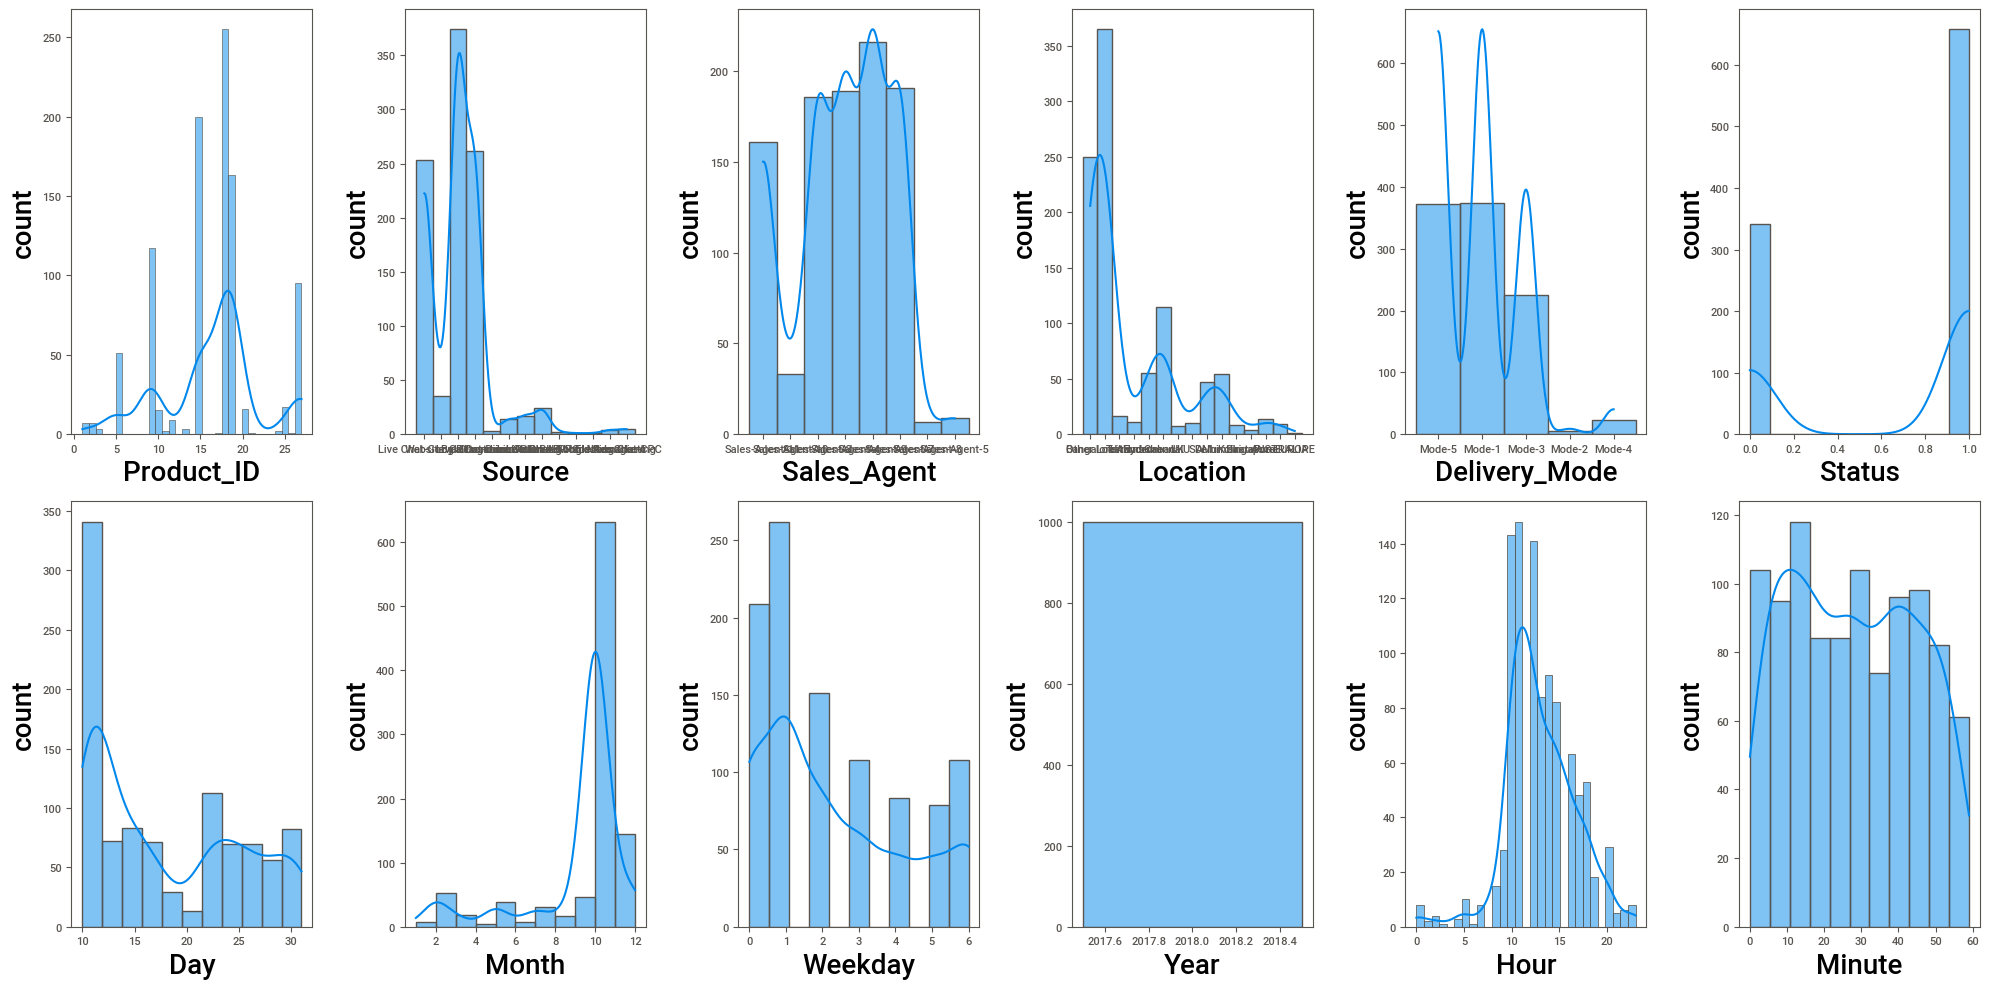

In [175]:
# Set canvas size 
plt.figure(figsize=(20,10))
plotnum=1
for column in data:
    if plotnum<=12:
        ax=plt.subplot(2,6,plotnum)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
        plotnum+=1
    plt.tight_layout()

#### Insights:

Product_ID:
-Product id 15 & 18 are represents more. 

Source:
-Call represents the highest source.

Sales_Agent:
Sales-Agent-9,7,4 & 3 represents highest score.

Location:
-Bangalore & other locations represents more percentage.

Delivery_Mode:
-Mode 1 & Mode 5 represents highest score.

Status:
-1 as High Potential are having more percentage compare to 0 as Low Potential.


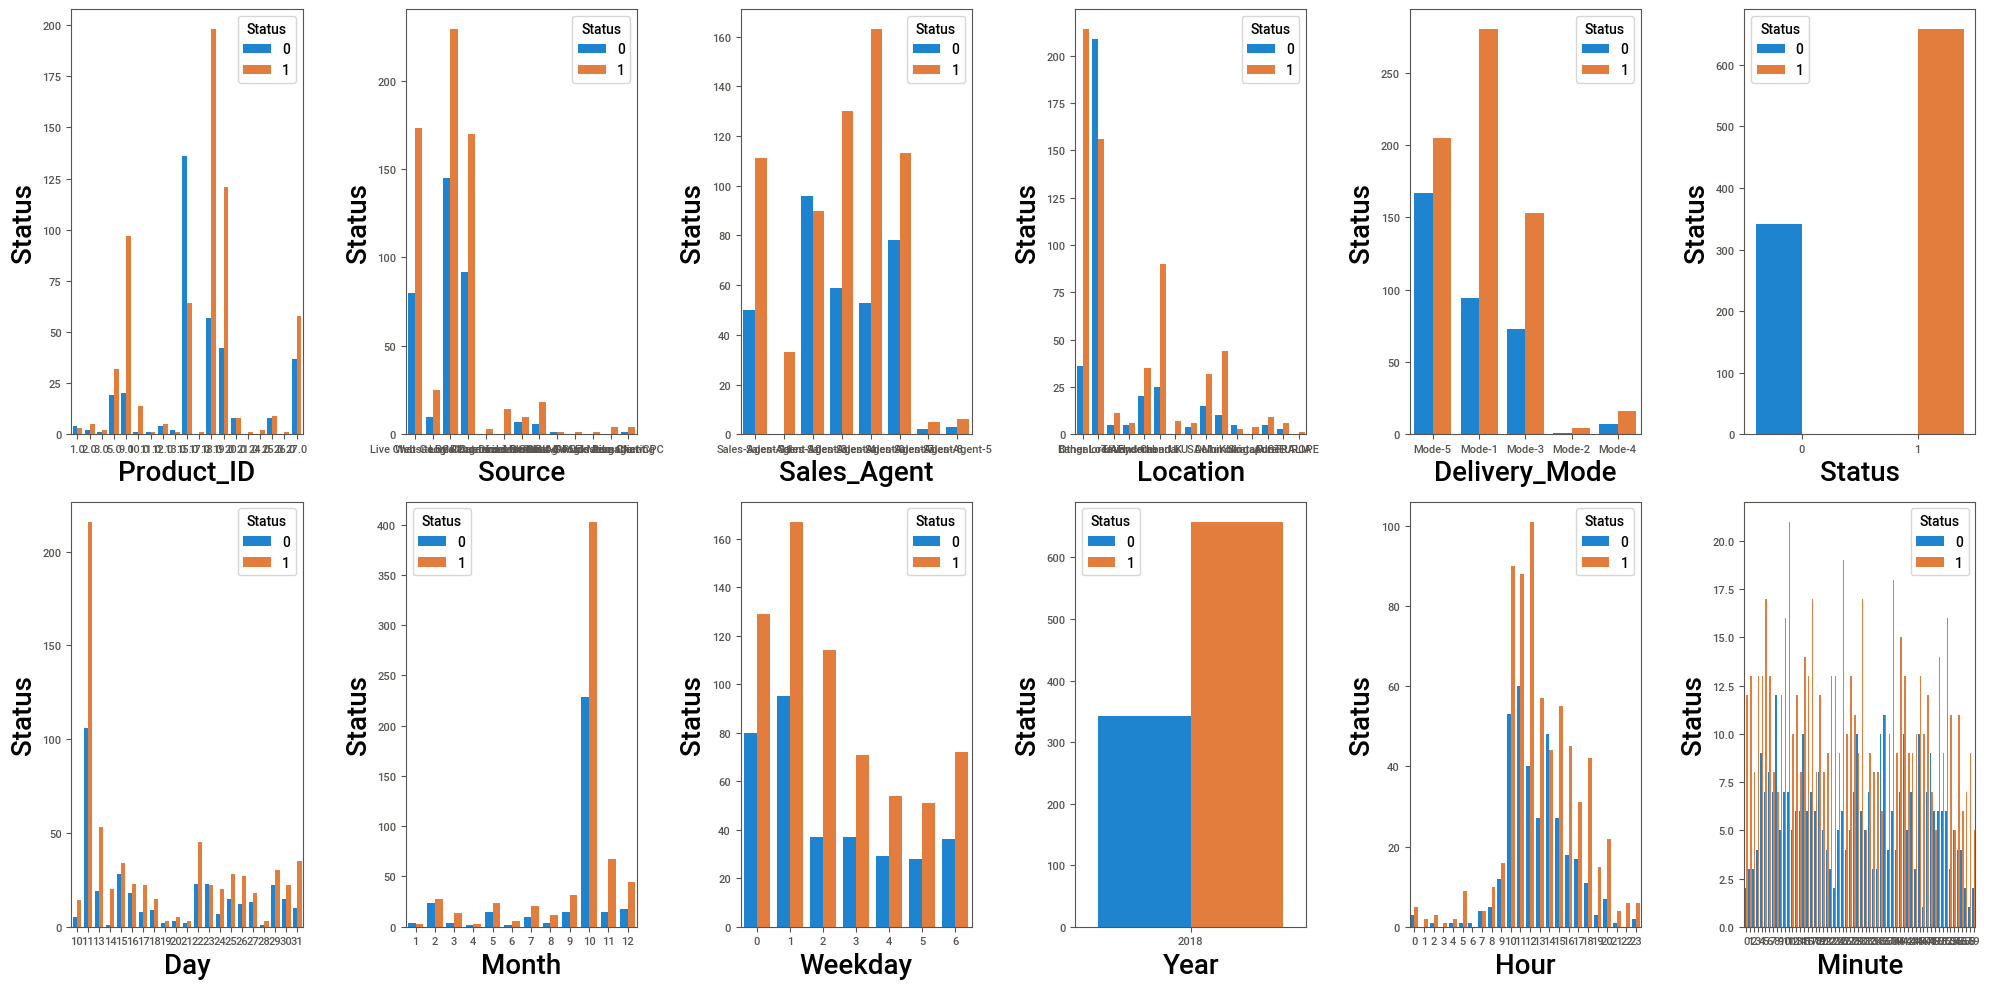

In [176]:
# Bivaraite Analysis

plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 :
        aa = plt.subplot(2,6,plotnumber)
        sns.countplot(x=data[column]
                        ,hue=data.Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()


#### Insights:

Product_ID:
-Product id 18 is having high potential of sales.

Source:
-Call is the source which having high potential of sales.

Sales_Agent:
-Sales agent-9 having the high potential of sales whether sales agent-8 having the low potential of sales.

Location:
-Bangalore is the location which is having high potential of sales.

Delivery_Mode:
-Mode-1 is the delivery mode having high potential of sales.


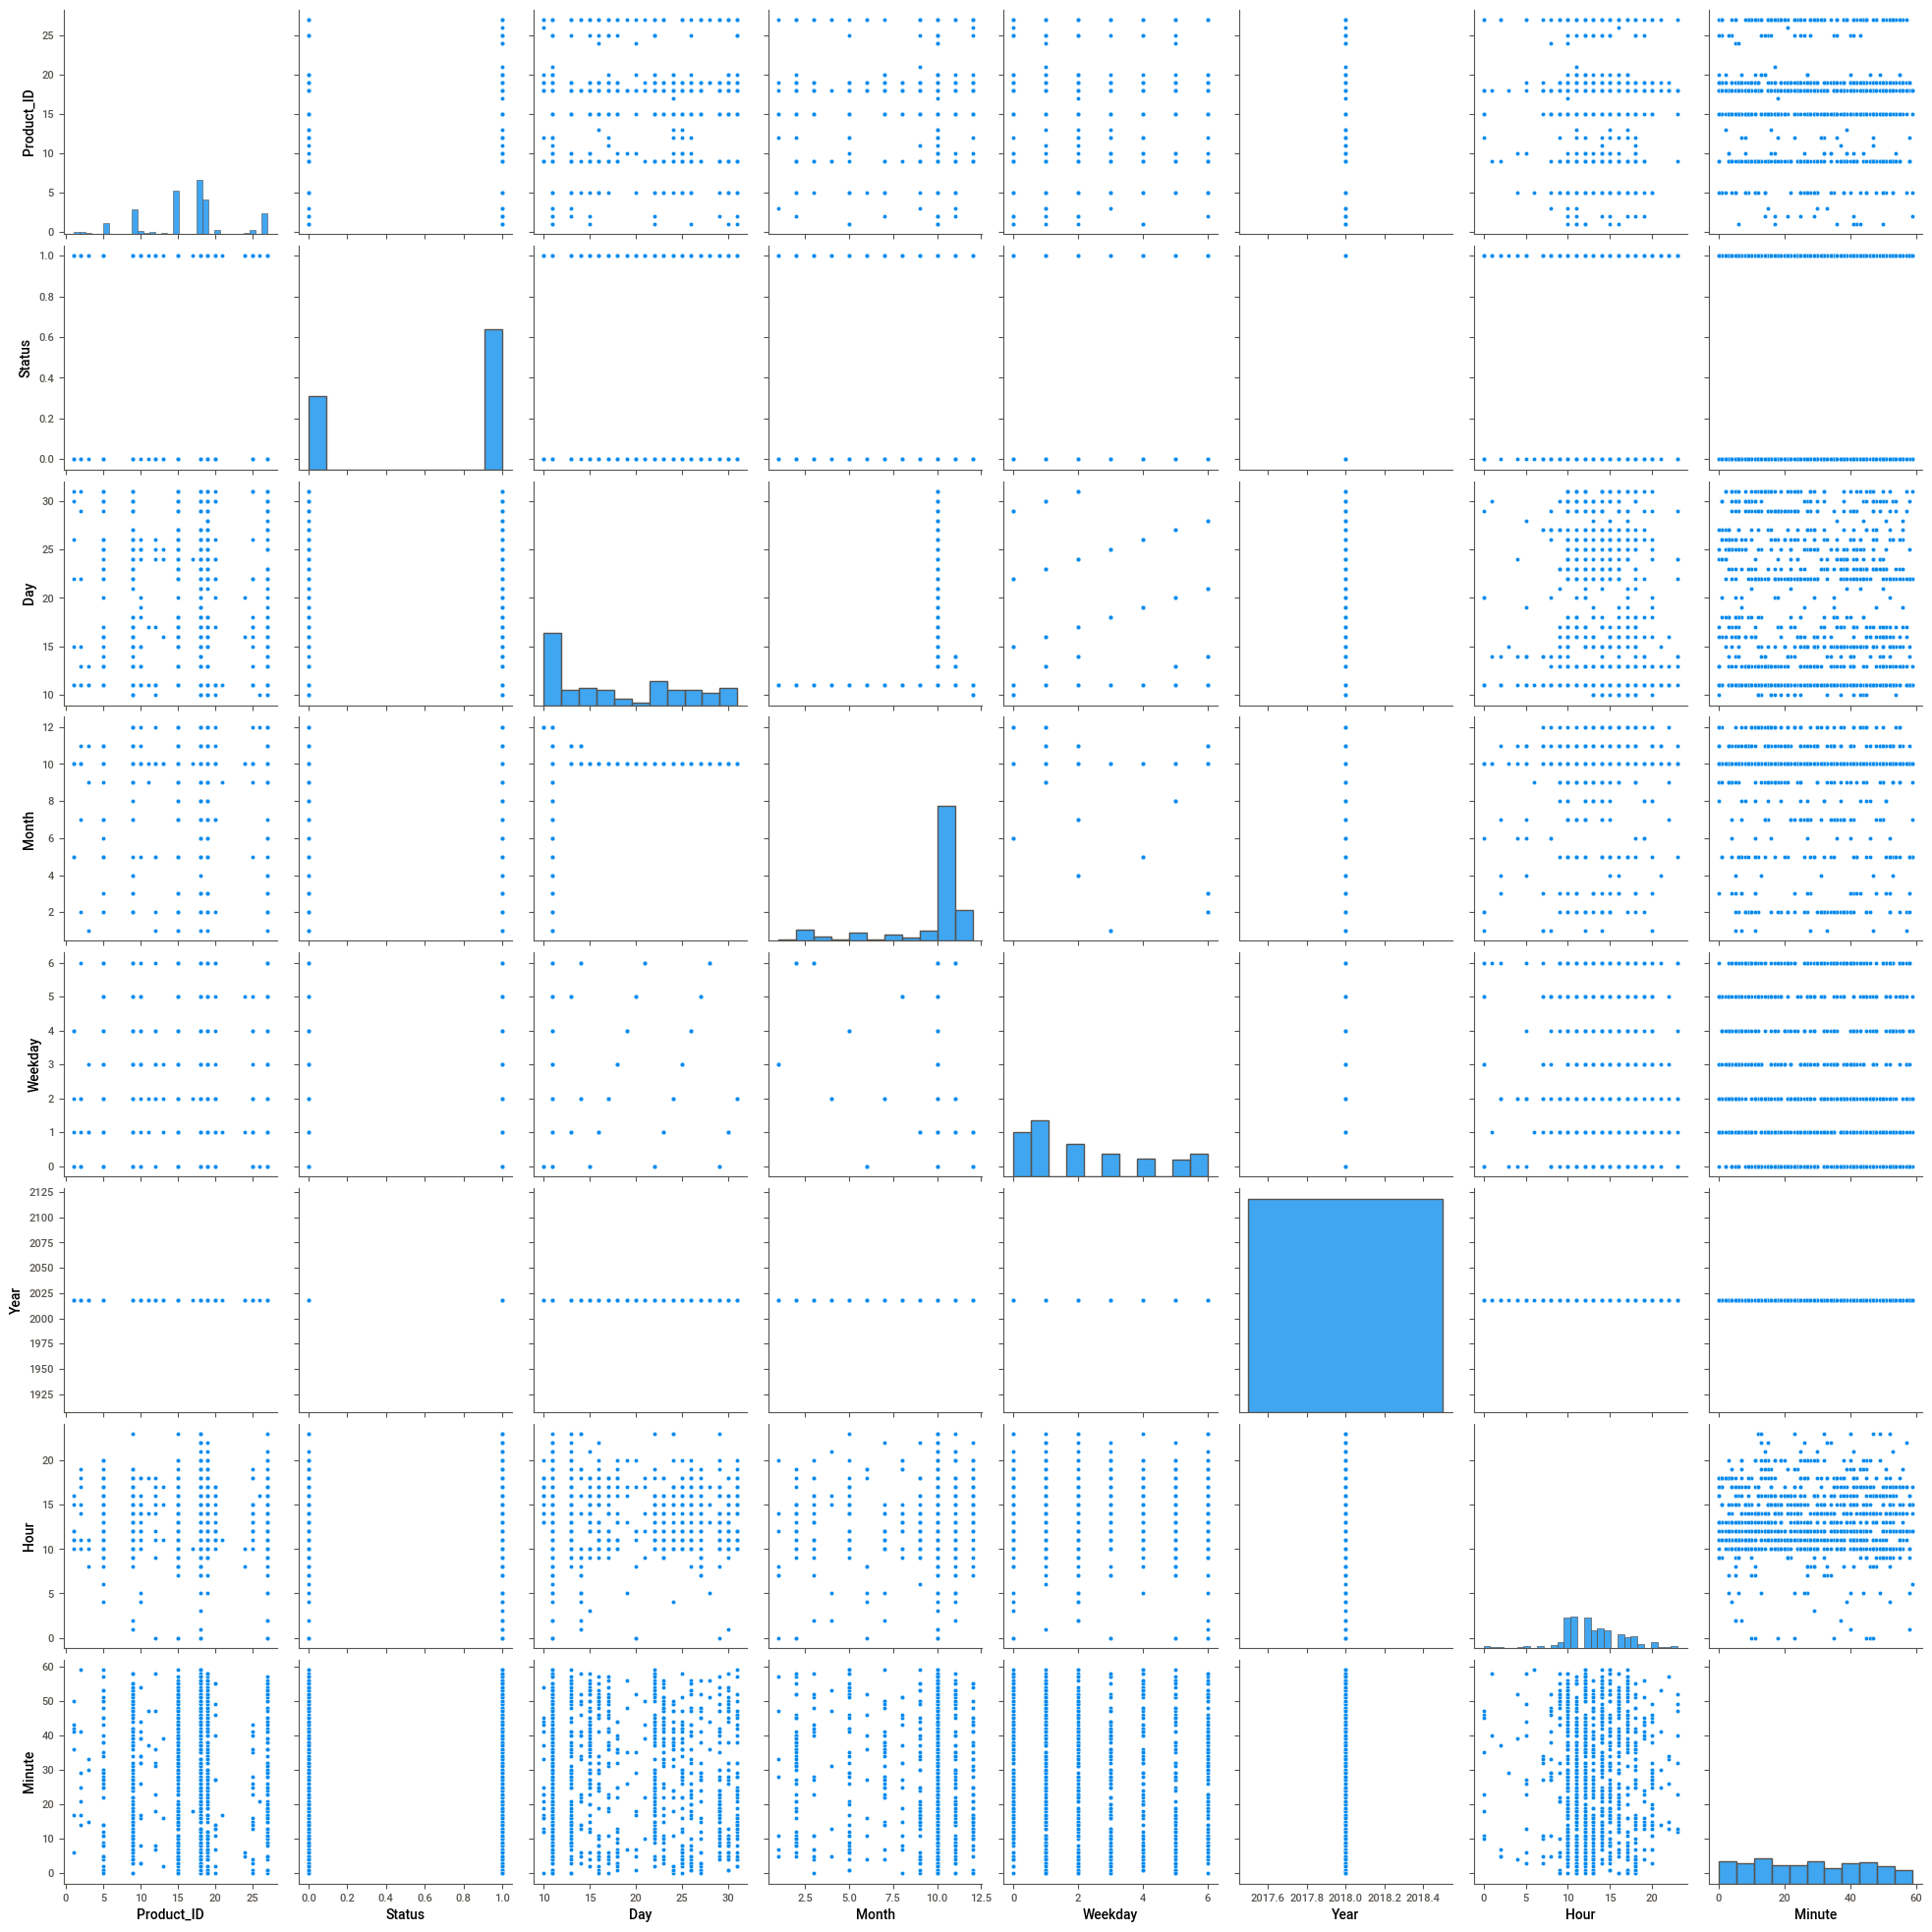

In [177]:
# Multivariate Analysis
sns.pairplot(data)

# Data Preprocessing

In [178]:
# Check for missing values
data.isnull().sum()

Product_ID       35
Source            5
Sales_Agent       8
Location         34
Delivery_Mode     0
Status            0
Day               0
Month             0
Weekday           0
Year              0
Hour              0
Minute            0
dtype: int64

In [179]:
# Handling missing values

# length of data
len(data)

1000

In [180]:
# If % of missing values is > 80% then we are going to drop that column, else handle the missing values

isnull=data.isnull().sum()/len(data)*100
isnull

Product_ID       3.5
Source           0.5
Sales_Agent      0.8
Location         3.4
Delivery_Mode    0.0
Status           0.0
Day              0.0
Month            0.0
Weekday          0.0
Year             0.0
Hour             0.0
Minute           0.0
dtype: float64

In [181]:
# There is no column that gives % of missing values > 80% , so handle the missing values for all missing value columns

In [182]:
categorical_data.columns

Index(['Created', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'],
      dtype='object')

In [183]:
# Handle the missing values in categorical columns ('Source', 'Sales_Agent', 'Location')
# replace missing values with mode

In [184]:
#Source

In [185]:
# Calculate mode first
data['Source'].mode()

0    Call
Name: Source, dtype: object

In [186]:
data.loc[data['Source'].isnull()==True,'Source']='Call'   # here Call is mode

In [187]:
#Sales_Agent

In [188]:
# Calculate mode first
data['Sales_Agent'].mode()

0    Sales-Agent-9
Name: Sales_Agent, dtype: object

In [189]:
data.loc[data['Sales_Agent'].isnull()==True,'Sales_Agent']='Sales-Agent-9'   # here Sales-Agent-9 is mode

In [190]:
#Location

In [191]:
# Calculate mode first
data['Location'].mode()

0    Other Locations
Name: Location, dtype: object

In [192]:
data.loc[data['Location'].isnull()==True,'Location']='Other Locations'   # here Other Locations is mode

In [193]:
# Check
data.head(3)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,NaN,Website,Sales-Agent-11,Other Locations,Mode-5,1,14,11,2,2018,10,5
1,NaN,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,9,22
2,NaN,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,9,21


In [194]:
# Handle the missing values of numerical column (Product_ID)

In [195]:
# Check for distribution whether its normal or not , if not normal replace missing values by median
# From EDA we can observed that there is no normal distribution for any numerical columns so handle these columns by replacing missing values by median

In [196]:
data.loc[data['Product_ID'].isnull()==True,'Product_ID']=data['Product_ID'].median()

In [197]:
# Check
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,1,14,11,2,2018,10,5
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,9,22
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,9,21
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,8,46
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,7,34


In [198]:
# Check for duplicates
data.duplicated().sum()

3

In [199]:
data.duplicated().tolist()

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [200]:
# WE have 3 duuplicates, drop it
data.drop_duplicates(inplace=True)

In [201]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,1,14,11,2,2018,10,5
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,9,22
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,9,21
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,8,46
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,1,14,11,2,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,Call,Sales-Agent-9,Mumbai,Mode-1,1,10,12,0,2018,14,54
996,19.0,Website,Sales-Agent-11,Mumbai,Mode-3,1,10,12,0,2018,14,44
997,18.0,Call,Sales-Agent-3,Chennai,Mode-1,1,10,12,0,2018,13,45
998,19.0,Call,Sales-Agent-11,Bangalore,Mode-5,1,10,12,0,2018,13,43


In [202]:
#check
data.duplicated().sum()

0

In [203]:
# Encoding:

# Coversion of categorical columns into numerical columns


In [204]:
# Check for categorical column
data.dtypes=='object'


Product_ID       False
Source            True
Sales_Agent       True
Location          True
Delivery_Mode     True
Status           False
Day              False
Month            False
Weekday          False
Year             False
Hour             False
Minute           False
dtype: bool

In [205]:
# We have 4 categorical columns in dataset.
# Source, Sales_Agent, Location, Delivery_Mode 

In [206]:
# Importing label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [207]:
# Label Encoding all the columns
enc = LabelEncoder()
for i in (1,2,3,4):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,18.0,12,1,8,4,1,14,11,2,2018,10,5
1,18.0,12,0,8,4,1,14,11,2,2018,9,22
2,18.0,12,0,8,4,1,14,11,2,2018,9,21
3,18.0,12,0,8,4,1,14,11,2,2018,8,46
4,18.0,12,0,8,4,1,14,11,2,2018,7,34


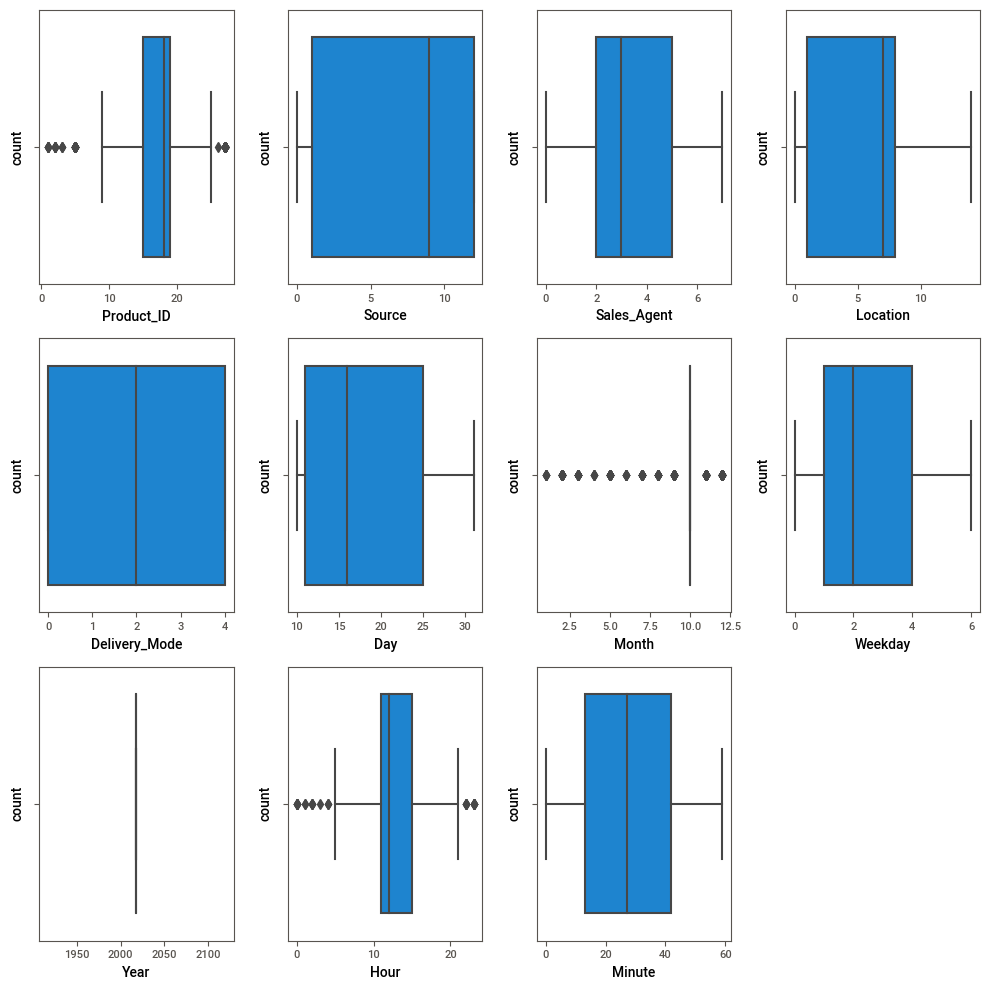

In [208]:
# Check for Outliers


plt.figure(figsize=(10,10))
plotnum=1
for column in data.drop('Status',axis=1):
    if plotnum<=12:
        ax=plt.subplot(3,4,plotnum)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
        plotnum+=1
    plt.tight_layout()


## Insights:

Here is outlier in Product ID, Month and Hour column,
now handle them:
1) IQR: method is used when data is not normal
2) 3 Sigma Rule: method is used when data is normal

In [209]:
# Handle outliers

<Axes: ylabel='Density'>

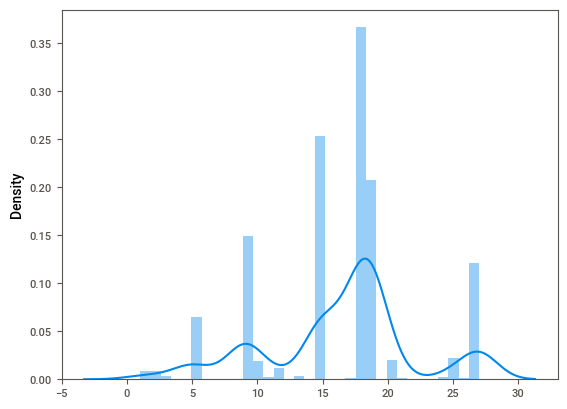

In [210]:
# Product_ID

#check distribution 
sns.distplot(x=data['Product_ID'])

Here data is not normal , so we will use IQR method

In [211]:
#find Q1
Q1=data['Product_ID'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 15.0


In [212]:
#find Q3
Q3=data['Product_ID'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 19.0


In [213]:
#calculate IQR
IQR=Q3-Q1
IQR

4.0

In [214]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit 9.0


In [215]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 25.0


In [216]:
#find the values below the lower limit
data.loc[data['Product_ID']<lower_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
38,5.0,9,5,14,2,1,13,11,1,2018,12,50
43,2.0,1,7,8,4,1,13,11,1,2018,11,29
49,3.0,1,3,8,4,1,13,11,1,2018,11,15
57,5.0,9,7,12,2,1,13,11,1,2018,10,30
106,5.0,10,7,8,2,0,11,11,6,2018,20,30
...,...,...,...,...,...,...,...,...,...,...,...,...
902,5.0,9,5,3,3,0,15,10,0,2018,14,12
915,1.0,1,5,1,0,1,15,10,0,2018,12,36
952,5.0,12,3,8,2,1,14,10,6,2018,19,14
959,5.0,9,3,3,2,1,13,10,5,2018,18,5


In [217]:
#find the values above the upper limit
data.loc[data['Product_ID']>upper_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
28,27.0,1,1,2,4,1,13,11,1,2018,16,9
32,27.0,9,1,5,2,1,13,11,1,2018,15,15
58,27.0,12,3,5,0,1,13,11,1,2018,10,18
68,27.0,9,3,8,2,1,11,12,1,2018,17,55
96,27.0,12,5,8,0,0,11,12,1,2018,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
963,27.0,11,2,1,0,1,13,10,5,2018,17,16
978,27.0,11,2,2,0,1,13,10,5,2018,11,28
981,27.0,12,2,8,0,0,10,12,0,2018,20,19
989,26.0,9,2,2,4,1,10,12,0,2018,16,21


In [218]:
# Find the percentage of outliers:
# If the percentage <5% (less than 5%), then only we will handle outliers
# If the perceentage >5% (greater than 5%), then dont handle it 

In [219]:
#find the len of lower limit
len(data.loc[data['Product_ID']<lower_limit])

68

In [220]:
#len of data
len(data)

997

In [221]:
#devide len of lower limit by len of data
len(data.loc[data['Product_ID']<lower_limit])/len(data)

0.06820461384152457

In [222]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Product_ID']<lower_limit])/len(data))*100

6.820461384152457

In [223]:
# 6% of outlier is there , #the perceentage  is greater than 5% then dont handle it for lower limit

In [224]:
#find the len of upper limit
len(data.loc[data['Product_ID']>upper_limit])

96

In [225]:
#len of data
len(data)

997

In [226]:
#devide len of upper limit by len of data
len(data.loc[data['Product_ID']>upper_limit])/len(data)

0.09628886659979939

In [227]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Product_ID']>upper_limit])/len(data))*100

9.628886659979939

In [228]:
# 9% of outlier is there , #the perceentage  is greater than 5% then dont handle it for upper limit

<Axes: ylabel='Density'>

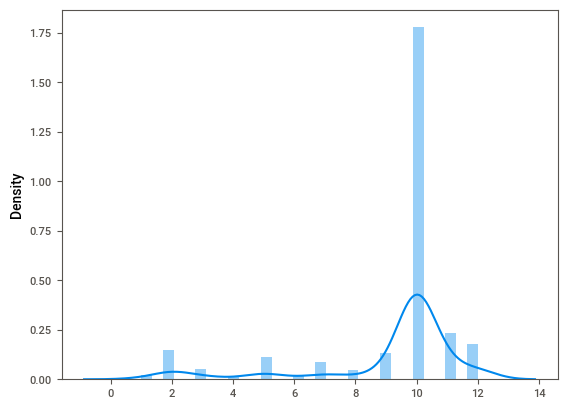

In [229]:
# Month

#check distribution 
sns.distplot(x=data['Month'])

Here data is not normal , so we will use IQR method

In [230]:
#find Q1
Q1=data['Month'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 10.0


In [231]:
#find Q3
Q3=data['Month'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 10.0


In [232]:
#calculate IQR
IQR=Q3-Q1
IQR

0.0

In [233]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit 10.0


In [234]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 10.0


In [235]:
#find the values below the lower limit
data.loc[data['Month']<lower_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
160,18.0,9,7,1,0,1,11,9,1,2018,22,15
161,11.0,1,5,2,4,1,11,9,1,2018,18,37
162,19.0,9,7,8,3,1,11,9,1,2018,18,17
163,27.0,9,2,1,0,0,11,9,1,2018,18,0
164,19.0,9,2,1,0,1,11,9,1,2018,16,30
...,...,...,...,...,...,...,...,...,...,...,...,...
378,15.0,12,2,8,4,0,11,1,3,2018,12,57
379,3.0,12,2,8,4,0,11,1,3,2018,8,33
380,15.0,12,2,8,4,0,11,1,3,2018,7,11
381,18.0,12,3,3,0,1,11,1,3,2018,7,5


In [236]:
#find the values above the upper limit
data.loc[data['Month']>upper_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,18.0,12,1,8,4,1,14,11,2,2018,10,5
1,18.0,12,0,8,4,1,14,11,2,2018,9,22
2,18.0,12,0,8,4,1,14,11,2,2018,9,21
3,18.0,12,0,8,4,1,14,11,2,2018,8,46
4,18.0,12,0,8,4,1,14,11,2,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,1,7,7,0,1,10,12,0,2018,14,54
996,19.0,12,1,7,2,1,10,12,0,2018,14,44
997,18.0,1,2,2,0,1,10,12,0,2018,13,45
998,19.0,1,1,1,4,1,10,12,0,2018,13,43


In [237]:
#find the len of lower limit
len(data.loc[data['Month']<lower_limit])

223

In [238]:
#len of data
len(data)

997

In [239]:
#devide len of lower limit by len of data
len(data.loc[data['Month']<lower_limit])/len(data)

0.22367101303911735

In [240]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Month']<lower_limit])/len(data))*100

22.367101303911735

In [241]:
# 22% of outlier is there , #the perceentage  is greater than 5% then dont handle it for lower limit

In [242]:
#find the len of upper limit
len(data.loc[data['Month']>upper_limit])

145

In [243]:
#len of data
len(data)

997

In [244]:
#devide len of upper limit by len of data
len(data.loc[data['Month']>upper_limit])/len(data)

0.14543630892678033

In [245]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Month']>upper_limit])/len(data))*100

14.543630892678033

In [246]:
# 14% of outlier is there , #the perceentage  is greater than 5% then dont handle it for upper limit

<Axes: ylabel='Density'>

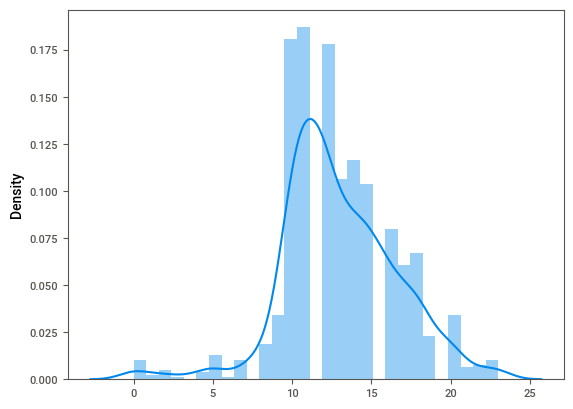

In [247]:
# Hour

#check distribution 
sns.distplot(x=data['Hour'])

Here data is not normal , so we will use IQR method

In [248]:
#find Q1
Q1=data['Hour'].quantile(0.25)
print('lower quantile',Q1)

lower quantile 11.0


In [249]:
#find Q3
Q3=data['Hour'].quantile(0.75)
print('Upper quantile',Q3)

Upper quantile 15.0


In [250]:
#calculate IQR
IQR=Q3-Q1
IQR

4.0

In [251]:
#Find lower limit & upper limit
lower_limit=Q1-1.5*IQR
print('lower limit',lower_limit)

lower limit 5.0


In [252]:
upper_limit=Q3+1.5*IQR
print('Upper limit',upper_limit)

Upper limit 21.0


In [253]:
#find the values below the lower limit
data.loc[data['Hour']<lower_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
11,18.0,12,0,8,4,1,14,11,2,2018,4,52
12,18.0,12,0,8,4,1,14,11,2,2018,2,37
159,15.0,12,5,9,4,1,11,10,3,2018,0,11
253,9.0,12,5,3,2,1,11,7,2,2018,2,7
260,5.0,12,2,8,2,0,11,6,0,2018,4,4
261,18.0,12,5,6,2,1,11,6,0,2018,0,46
305,27.0,12,2,8,4,0,11,4,2,2018,2,5
323,27.0,12,7,1,0,1,11,3,6,2018,2,5
374,27.0,12,1,8,4,0,11,2,6,2018,0,45
375,27.0,12,2,8,0,0,11,2,6,2018,0,10


In [254]:
#find the values above the upper limit
data.loc[data['Hour']>upper_limit]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
13,18.0,1,0,8,4,1,13,11,1,2018,23,40
61,18.0,12,3,1,0,1,11,12,1,2018,22,33
126,18.0,12,0,8,4,1,11,10,3,2018,22,34
160,18.0,9,7,1,0,1,11,9,1,2018,22,15
223,19.0,12,3,8,2,1,11,7,2,2018,22,26
262,18.0,0,7,1,0,1,11,5,4,2018,23,32
465,9.0,12,3,1,0,1,29,10,0,2018,23,12
634,18.0,12,3,8,4,1,24,10,2,2018,23,49
635,15.0,12,3,2,4,0,24,10,2,2018,23,47
706,18.0,12,1,1,4,1,22,10,0,2018,23,52


In [255]:
#find the len of lower limit
len(data.loc[data['Hour']<lower_limit])

18

In [256]:
#len of data
len(data)

997

In [257]:
#devide len of lower limit by len of data
len(data.loc[data['Hour']<lower_limit])/len(data)

0.01805416248746239

In [258]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Hour']<lower_limit])/len(data))*100

1.8054162487462388

In [259]:
# 1.8% of outlier is there , handle it by replacing those observations which giving you outlier by median since data is not normal

In [260]:
data.loc[data['Hour']<lower_limit,'Hour']=data['Hour'].median()

In [261]:
#we successfully handle outliers wrt lower limit

In [262]:
#find the len of upper limit
len(data.loc[data['Hour']>upper_limit])

14

In [263]:
#len of data
len(data)

997

In [264]:
#devide len of upper limit by len of data
len(data.loc[data['Hour']>upper_limit])/len(data)

0.014042126379137413

In [265]:
#to convert it into percentage multiply by 100
(len(data.loc[data['Hour']>upper_limit])/len(data))*100

1.4042126379137412

In [266]:
# 1.4% of outlier is there , handle it by replacing those observations which giving you outlier by median since data is not normal

In [267]:
data.loc[data['Hour']>upper_limit,'Hour']=data['Hour'].median()

In [268]:
#we successfully handle outliers wrt upper limit

# Feature Selection

In [269]:
# Drop the irrelevant column 
# we already dropped it

<Axes: >

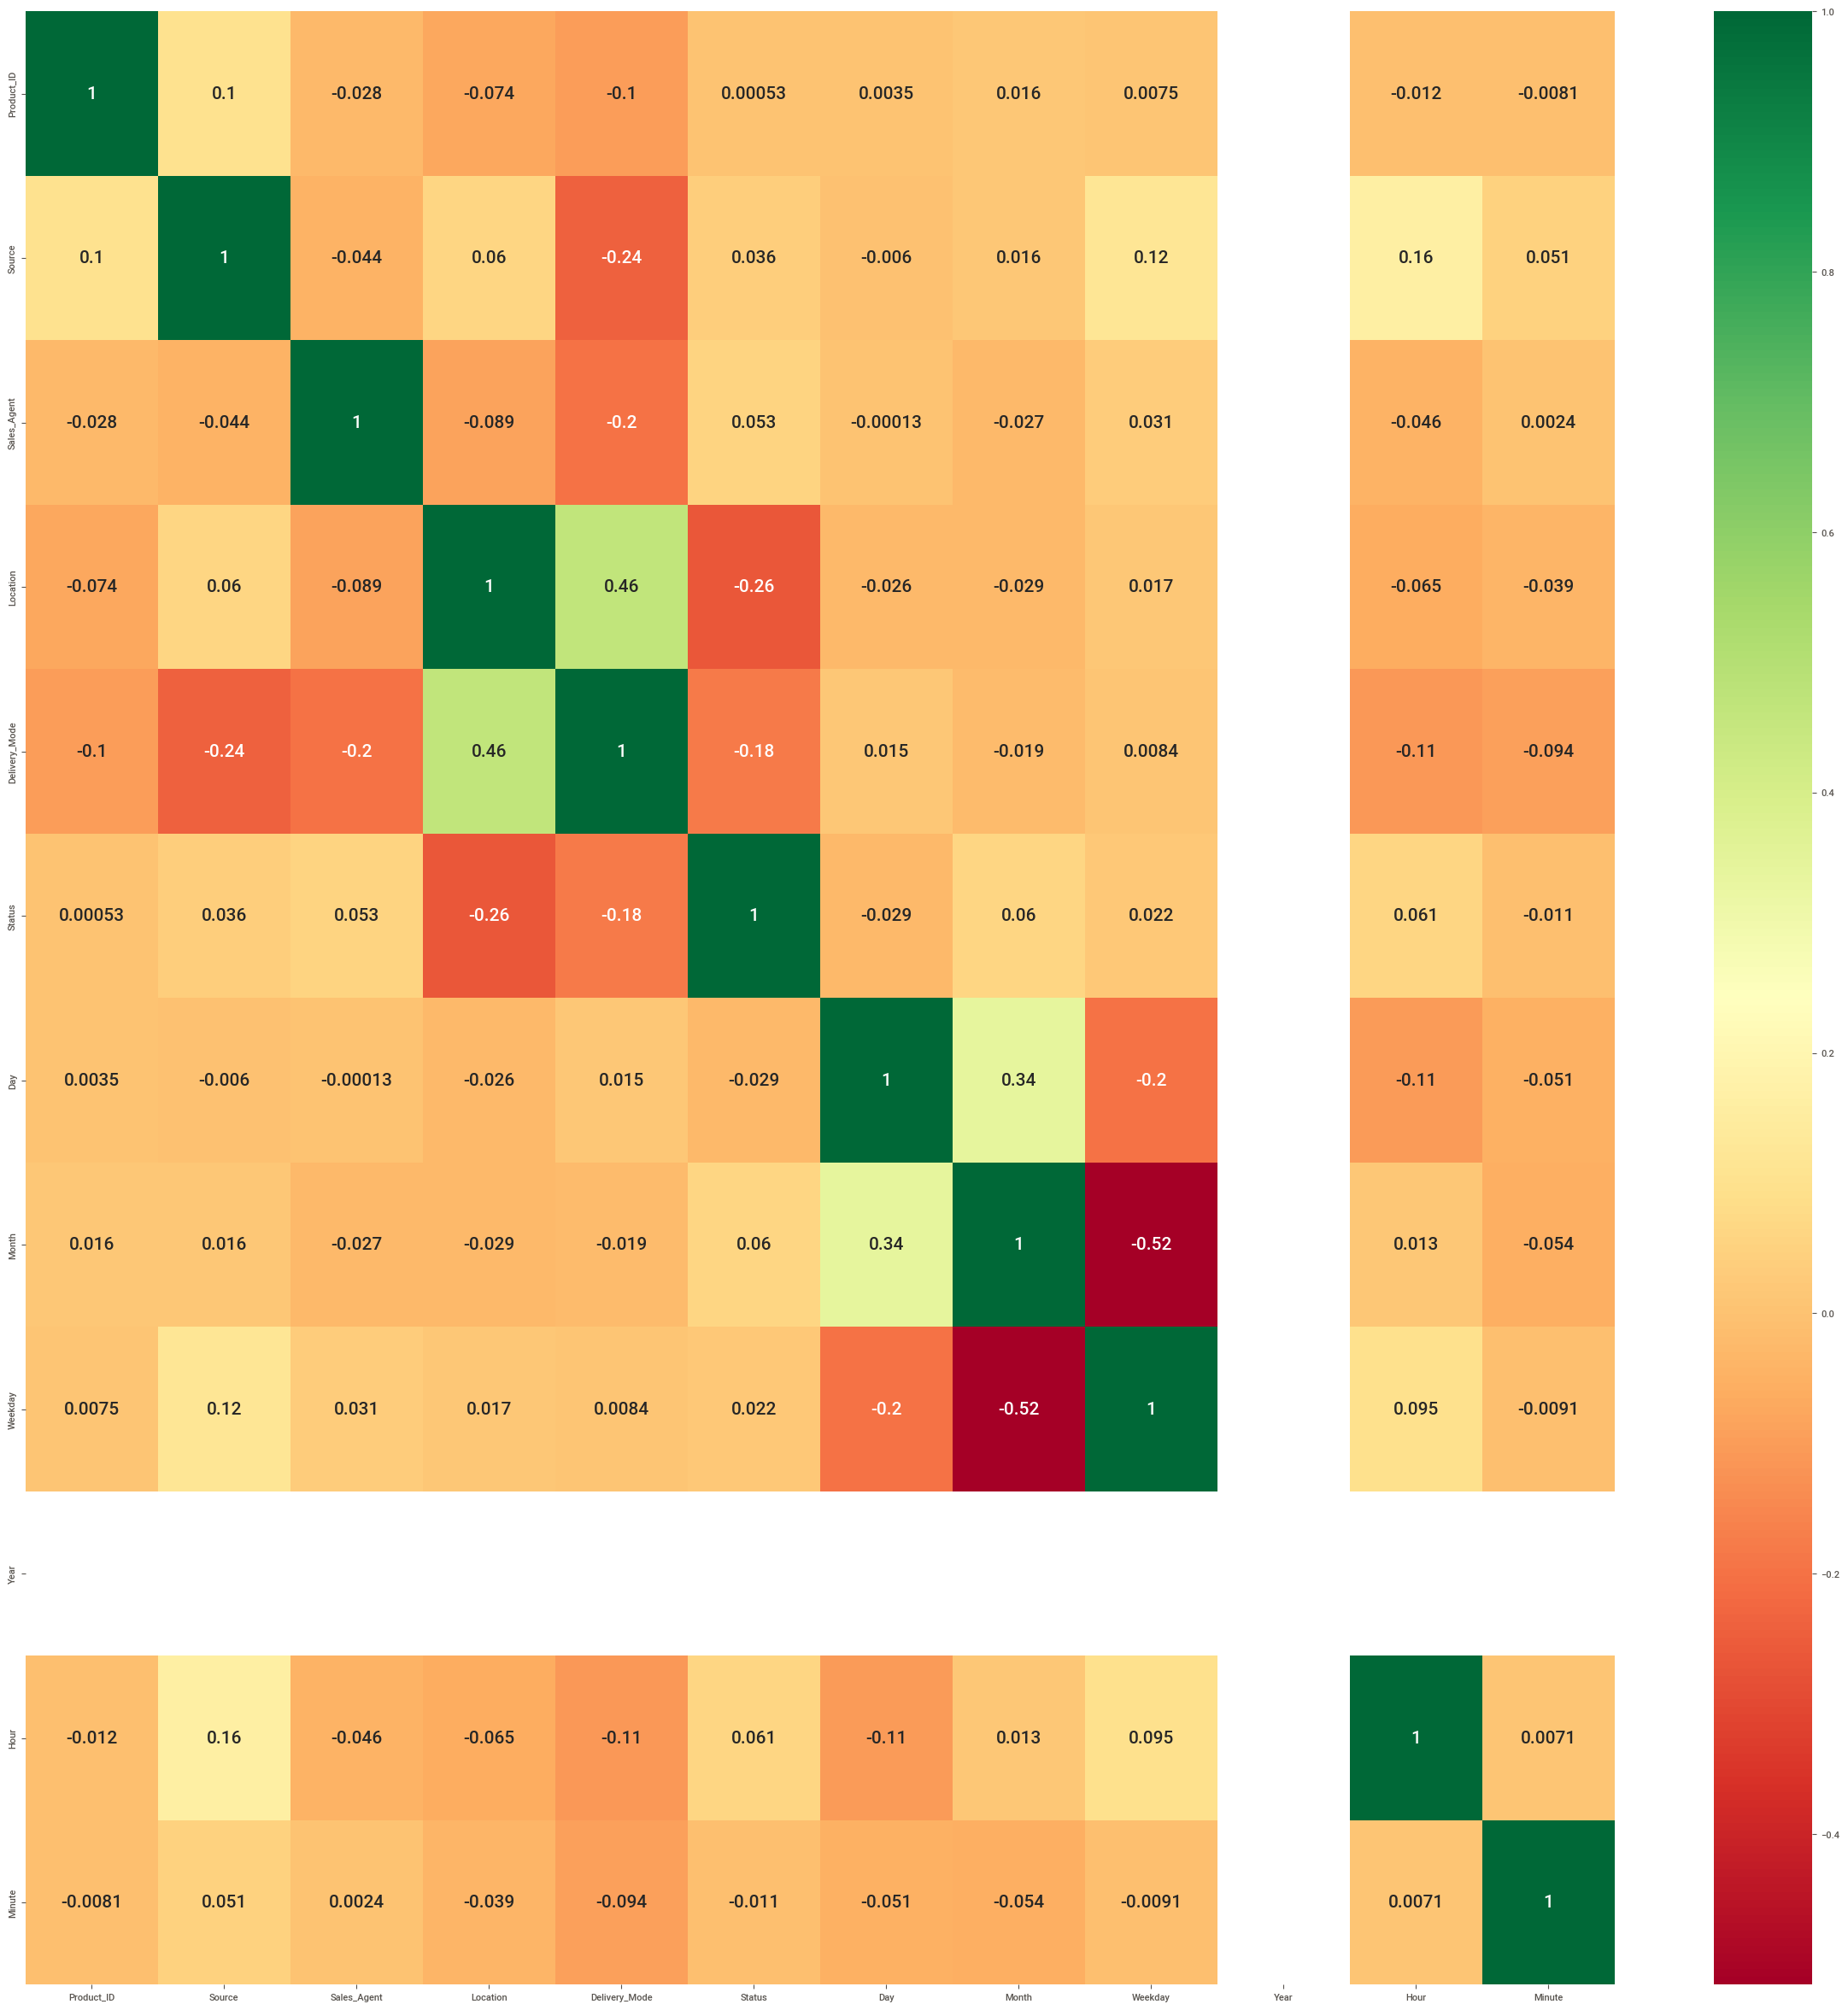

In [270]:
# Correlation
plt.figure(figsize=(30,30)) #canvas size
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':15})

In [271]:
# Since no column is showing crrelation of more than 85% , therefore we are not dropping any column

In [272]:
# Now the data is completely ready and clean.....so we are going to train the model 

# Model Building

In [273]:
# Split data into x & y
x=data.drop('Status',axis=1)
y=data.Status

In [274]:
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Day,Month,Weekday,Year,Hour,Minute
0,18.0,12,1,8,4,14,11,2,2018,10,5
1,18.0,12,0,8,4,14,11,2,2018,9,22
2,18.0,12,0,8,4,14,11,2,2018,9,21
3,18.0,12,0,8,4,14,11,2,2018,8,46
4,18.0,12,0,8,4,14,11,2,2018,7,34
...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,1,7,7,0,10,12,0,2018,14,54
996,19.0,12,1,7,2,10,12,0,2018,14,44
997,18.0,1,2,2,0,10,12,0,2018,13,45
998,19.0,1,1,1,4,10,12,0,2018,13,43


In [275]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Status, Length: 997, dtype: int64

In [276]:
# Unique value of output (target)
data.Status.unique()

array([1, 0], dtype=int64)

In [277]:
# Records related to 0 & 1
data.Status.value_counts()

1    656
0    341
Name: Status, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

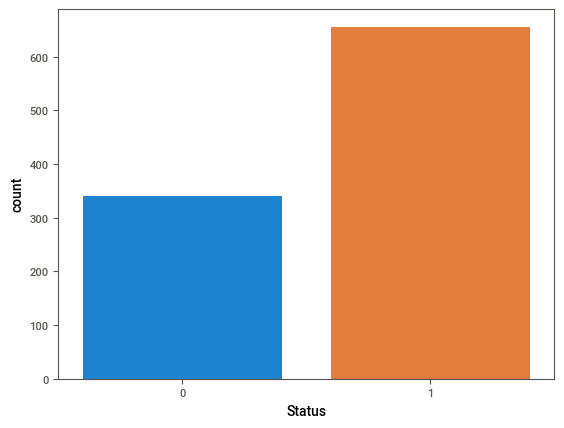

In [278]:
# Check for the data is balanced or not
sns.countplot(x=data.Status)


-As the dataset is imbalanced, We have to handle it.

In [279]:
# Split the data for training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [280]:
# Balancing the data
# Data is imbalanced, so we have to balanced the data=> using SMOTE
# Balancing should be applied here, after we split the data into train and test

In [281]:
# Install imblearn package

!pip install imblearn

In [282]:
# Balancing the data
from imblearn.over_sampling import SMOTE
# Object creation
smote=SMOTE()     
# Importing counter to check count of each label
from collections import Counter
# Checking count for each class
print('Actual Classes',Counter(y_train))
# Applying sampling on target variable
x_smote, y_smote = smote.fit_resample(x_train,y_train)    
#Checking count after sampling for each class
print('Smote Classes',Counter(y_smote))

Actual Classes Counter({1: 458, 0: 239})
Smote Classes Counter({0: 458, 1: 458})


## Apply Algorithm:

1) Logistic Regression
2) SVM
3) KNN
4) Decision Tree
5) Random Forest
6) Gradient Boosting
7) XG Boost

# Evaluation of Model

In [283]:
# Importing evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

## Logistic Regression

In [284]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression
#initialise the model
LR=LogisticRegression()
#train the model
LR.fit(x_smote,y_smote)

LogisticRegression()

In [285]:
y_pred1=LR.predict(x_test)

In [286]:
confusion_matrix(y_test,y_pred1)

array([[ 65,  37],
       [ 89, 109]], dtype=int64)

In [287]:
accuracy_score(y_test,y_pred1)

0.58

In [288]:
#Precision
precision_score(y_test,y_pred1) 

0.7465753424657534

In [289]:
#Recall
recall_score(y_test,y_pred1) 

0.5505050505050505

In [290]:
#f1 score
f1_score(y_test,y_pred1)

0.6337209302325582

In [291]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.42      0.64      0.51       102
           1       0.75      0.55      0.63       198

    accuracy                           0.58       300
   macro avg       0.58      0.59      0.57       300
weighted avg       0.64      0.58      0.59       300



In [292]:
from sklearn.metrics import roc_curve,auc

In [293]:
False_positive_rate,True_positive_rate,Thresholds=roc_curve(y_test,y_pred1)

In [294]:
roc_auc_score=auc(False_positive_rate,True_positive_rate)
print(roc_auc_score)

0.5938799762329174


## SVM

In [295]:
#Import SVC
from sklearn.svm import SVC
#initialise the model
SVM=SVC()
#train the model
SVM.fit(x_smote,y_smote)

SVC()

In [296]:
y_pred2=SVM.predict(x_test)

In [297]:
confusion_matrix(y_test,y_pred2)

array([[ 58,  44],
       [ 75, 123]], dtype=int64)

In [298]:
accuracy_score(y_test,y_pred2)

0.6033333333333334

In [299]:
#Recall
recall_score(y_test,y_pred2) 

0.6212121212121212

In [300]:
#f1 score
f1_score(y_test,y_pred2) 

0.673972602739726

In [301]:
classification_report=print(classification_report(y_test,y_pred2)) 

              precision    recall  f1-score   support

           0       0.44      0.57      0.49       102
           1       0.74      0.62      0.67       198

    accuracy                           0.60       300
   macro avg       0.59      0.59      0.58       300
weighted avg       0.63      0.60      0.61       300



In [302]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [303]:
score=cross_val_score(SVM,x,y,cv=10,scoring='f1')
print(score)

[0.79518072 0.79518072 0.79518072 0.79518072 0.79518072 0.79518072
 0.78787879 0.79268293 0.79268293 0.79268293]


Model is good because there are very less variations between scores.

In [304]:
#mean
print('cross validation score',score.mean())

cross validation score 0.7937011905715992


In [305]:
#std
#std is < 0.05 then we say model is good otherwise bad
print('standard deviation',score.std())

standard deviation 0.0022393090804767326


Model is good because the std is < 0.05

## KNN

In [319]:
#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#initialise the model
KNN=KNeighborsClassifier(n_neighbors=5)
#train the model
KNN.fit(x_smote,y_smote)

KNeighborsClassifier()

In [320]:
y_pred=KNN.predict(x_test)

In [321]:
accuracy_score(y_test,y_pred)

0.5966666666666667

In [322]:
# Selecting a precise K value
error=[]
for k in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_smote,y_smote)
    y_pred=KNN.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error')

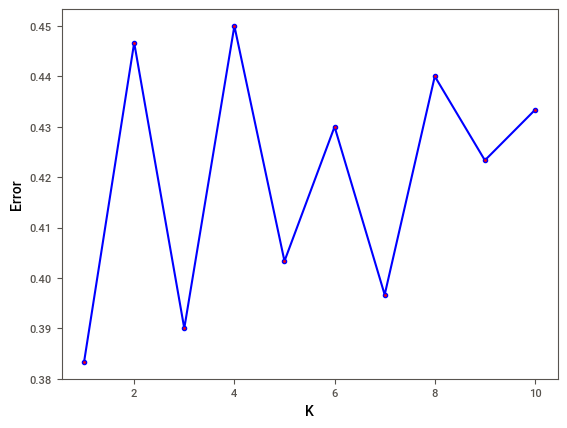

In [323]:
plt.plot(range(1,11),error,color='blue',marker='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error')

In [324]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=3)

In [325]:
y_pred3=KNN.predict(x_test)

In [326]:
confusion_matrix(y_test,y_pred3)

array([[ 66,  36],
       [ 81, 117]], dtype=int64)

In [327]:
accuracy_score(y_test,y_pred3)

0.61

In [328]:
#Precision
precision_score(y_test,y_pred3) 

0.7647058823529411

In [329]:
#Recall
recall_score(y_test,y_pred3) 

0.5909090909090909

In [330]:
#f1 score
f1_score(y_test,y_pred3) 

0.6666666666666667

## Decision Tree

In [332]:
#import  Decision Tree
from sklearn.tree import DecisionTreeClassifier
#initialise the model
DT=DecisionTreeClassifier()
#train the model
DT.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [333]:
y_pred4=DT.predict(x_test)

In [334]:
confusion_matrix(y_test,y_pred4)

array([[ 57,  45],
       [ 65, 133]], dtype=int64)

In [335]:
accuracy_score(y_test,y_pred4)

0.6333333333333333

In [336]:
#Precision
precision_score(y_test,y_pred4) 

0.7471910112359551

In [337]:
#Recall
recall_score(y_test,y_pred4) 

0.6717171717171717

In [338]:
#f1 score
f1_score(y_test,y_pred4) 

0.7074468085106383

## Random Forest

In [340]:
#import Random Forest
from sklearn.ensemble import RandomForestClassifier
#initialise teh model
RF=RandomForestClassifier()
#train the model
RF.fit(x_smote,y_smote)

RandomForestClassifier()

In [341]:
#prediction
y_pred5=RF.predict(x_test)

In [342]:
confusion_matrix(y_test,y_pred5)

array([[ 53,  49],
       [ 51, 147]], dtype=int64)

In [343]:
accuracy_score(y_test,y_pred5)

0.6666666666666666

In [344]:
#Precision
precision_score(y_test,y_pred5) 

0.75

In [345]:
#Recall
recall_score(y_test,y_pred5) 

0.7424242424242424

In [346]:
#f1 score
f1_score(y_test,y_pred5) 

0.7461928934010154

## Gradient Boosting

In [348]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=78)
GB.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=78)

In [349]:
y_pred6=GB.predict(x_test)

In [350]:
confusion_matrix(y_test,y_pred6)

array([[ 54,  48],
       [ 39, 159]], dtype=int64)

In [351]:
accuracy_score(y_test,y_pred6)

0.71

In [352]:
#Precision
precision_score(y_test,y_pred6) 

0.7681159420289855

In [353]:
#Recall
recall_score(y_test,y_pred6) 

0.803030303030303

In [354]:
#f1 score
f1_score(y_test,y_pred6) 

0.785185185185185

## XG Boost

In [356]:
# Installing xg boost
! pip install xgboost

In [357]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [358]:
y_pred7=model.predict(x_test)

In [359]:
confusion_matrix(y_test,y_pred7)

array([[ 52,  50],
       [ 47, 151]], dtype=int64)

In [360]:
accuracy_score(y_test,y_pred7)

0.6766666666666666

In [361]:
#Precision
precision_score(y_test,y_pred7) 

0.7512437810945274

In [362]:
#Recall
recall_score(y_test,y_pred7) 

0.7626262626262627

In [363]:
#f1 score
f1_score(y_test,y_pred7) 

0.7568922305764412

# Hyperparameter Tunning

### SVM

In [364]:
#Gridsearch cv:
from sklearn.model_selection import GridSearchCV

In [365]:
#define hyperparameter range
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.0001],'random_state':list(range(1,20))}

In [366]:
#apply the model
model=SVC()

In [367]:
#initialise gridsearchcv
grid=GridSearchCV(model,param_grid,verbose=2,scoring='f1',cv=5)  
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0

[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=8; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.1s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.1s
[CV] END .......................C=5, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=10; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ..................C

[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.2s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.2s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.1s
[CV] END ...................

[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=5

[CV] END ......................C=60, gamma=1, random_state=9; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=11; total time=   0.1s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.1s
[CV] END ..................C=60, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=6

[CV] END .....................C=70, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [368]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'random_state': 1}


In [369]:
m=SVC(C=0.1, gamma=1,random_state=1)
m.fit(x_smote,y_smote)

SVC(C=0.1, gamma=1, random_state=1)

In [370]:
y_pred=m.predict(x_test)

In [371]:
accuracy_score(y_test,y_pred)

0.66

### Decision Tree

In [372]:
from sklearn.model_selection import GridSearchCV

In [373]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [374]:
#ApplY gridsearch CV
dt=DecisionTreeClassifier(random_state=3)
dt_cv=GridSearchCV(dt,params,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)

dt_cv.fit(x_smote,y_smote)
best_params=dt_cv.best_params_
print(f'best param:{best_params}')

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
best param:{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


In [375]:
dt_cv.best_score_

0.7357977070609665

In [377]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=1, min_samples_split=3, splitter='random')
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [378]:
y_pred_train=model.predict(x_smote)

In [379]:
#testing accuracy
accuracy_score(y_test,y_pred) 

0.64

In [380]:
#training accuracy
accuracy_score(y_smote,y_pred_train) 

0.9246724890829694

### Random Forest

In [381]:
from sklearn.model_selection import RandomizedSearchCV
#no. of estimators or no. of decision tree, linspace=linearly spaced values(start:stop:step)
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
#auto,random,square root of features
max_features = ['auto', 'sqrt']
#max-depth
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
#sampling:  it is with replacement or without
bootstrap = [True, False]

In [382]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)    

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False})


In [383]:
rf_clf2 = RandomForestClassifier(n_estimators= 1000, min_samples_split=5, min_samples_leaf= 2, max_features='sqrt', max_depth=100, bootstrap=False) #passing best parameter to random forest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)

In [384]:
#training accuracy
y_train_pred=rf_clf2.predict(x_train)

In [385]:
#testing accuracy
accuracy_score(y_test,y_predict)

0.7266666666666667

In [386]:
#training accuracy
accuracy_score(y_train,y_train_pred)

0.9856527977044476

### XG Boost

In [387]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


In [388]:
XGB = XGBClassifier(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

In [389]:
# training data on randomsearch cv
rcv.fit(x_train, y_train) 
# best parameters
cv_best_params = rcv.best_params_
# printing  best parameters
print(f"Best paramters: {cv_best_params})") 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 0.8, 'n_estimators': 65, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.1})


In [390]:
XGB2=XGBClassifier(reg_lambda= 51.2, reg_alpha=0.8, n_estimators=65, max_depth=11,
                   learning_rate=0.1, gamma=0.1)
#training
XGB2.fit(x_train, y_train)  
#testing
y_predict=XGB2.predict(x_test)  

In [391]:
y_train_pred=XGB2.predict(x_train)

In [392]:
accuracy_score(y_test,y_predict)

0.7033333333333334

# Conclusion:

-Among all the models Random Forest, Gradient Boosting and XG Boost model giving highest accuracy score.
 
-Depends upon hyperparameter accuracy changes.

-Machine learning models are useful to predict the lead category (High Potential , Low Potential).